In [20]:
import pandas as pd
import numpy as np
from collections import Counter
from unidecode import unidecode
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
np.random.seed(42)

# One Hot Encoding

In [2]:
mails = pd.read_json('data/mails_preprocessing.json')
print(mails.shape)
mails

(8564, 22)


,from,label,text,_questionmark_count_,text_lem,_AJD_count_,_ADP_count_,_ADV_count_,_AUX_count_,_CCONJ_count_,...,_NOUN_count_,_NUM_count_,_PRON_count_,_PROPN_count_,_PUNCT_count_,_SCONJ_count_,_SYM_count_,_VERB_count_,_X_count_,unique_words_count
0,=?iso-8859-1?q?guillaume_v=e9ronique?=\r\n\t<v...,1,acces decibel bonjour pouvez vous donner les a...,2,acce decibel bonjour pouvoir donner acces deci...,0,7,1,1,0,...,18,2,3,0,2,0,0,3,1,233
1,levisse xavier <xavier.levisse@harmonie-mutuel...,1,actes indemnités hospitalières tu sais ce que ...,2,acte indemnite hospitalier savoir acte frais r...,0,3,3,0,2,...,12,2,5,0,2,1,0,6,0,177
2,courtais yohan <yohan.courtais@harmonie-mutuel...,1,analyse des obsèques naissances appareils audi...,1,analyse obseque naissance appareil auditif bon...,0,6,3,0,2,...,23,1,8,0,4,3,0,8,0,274
3,levisse xavier <xavier.levisse@harmonie-mutuel...,1,ano ihm bonjour j ai un multivalue filtres eta...,1,ano ihm bonjour multivalu filtre etablissement...,0,2,1,0,1,...,11,1,1,0,1,0,0,2,3,172
4,=?iso-8859-1?q?pernot_val=e9rie?= <valerie.per...,1,ano alimentation réseau sur dcb bonjour je m i...,1,ano alimentation reseau dob bonjour metre inte...,0,38,6,6,2,...,56,3,14,1,10,1,0,20,0,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,mezrag noura <noura.mezrag@prestataire.sihm.fr>,2,recette datasets bilan tour 1 bonjour brice v...,1,recette dataset bilan tour bonjour brice recet...,0,126,24,12,10,...,232,16,15,0,14,4,2,63,75,2821
8560,=?utf-8?b?r1jpu0pfqu4gtmopyq==?= <lea.grosjean...,2,inscription ateliers vous aider dans votre re...,4,inscription atelier aider recherche emploi che...,0,49,6,3,11,...,70,9,21,2,12,1,0,33,0,889
8561,hassou jihane <jihane.hassou@harmonie-mutuelle...,2,organisation bonjour j ai créé la teams proje...,0,organisation bonjour creer team projet synergi...,0,7,4,2,1,...,19,1,7,3,3,1,0,11,0,296
8562,derragui zeyneb <zeyneb.derragui@harmonie-mutu...,2,profil administrateur bonjour brice bonjour m...,1,profil administrateur bonjour brice bonjour ma...,0,10,3,0,1,...,44,0,6,0,5,0,0,10,10,552


In [3]:
from onehotencoder import ohe_df
data = ohe_df(mails, input_col = 'text_lem', bigrams = False)
data

,acce,decibel,bonjour,pouvoir,donner,acces,julien,raymond,charger,affaire,...,ingenierie,murat,pack,articulation,ronde,ecol,lanrivain,batard,leudet,_label_
0,1,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8560,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2
8561,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8562,0,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
df_features = mails.iloc[:,3::].drop('text_lem', axis = 1)
df = pd.concat([df_features, data], axis = 1)
print(df.shape)
df.head()

(8564, 9192)


,_questionmark_count_,_AJD_count_,_ADP_count_,_ADV_count_,_AUX_count_,_CCONJ_count_,_DET_count_,_INTJ_count_,_NOUN_count_,_NUM_count_,...,ingenierie,murat,pack,articulation,ronde,ecol,lanrivain,batard,leudet,_label_
0,2,0,7,1,1,0,3,0,18,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,3,3,0,2,5,0,12,2,...,0,0,0,0,0,0,0,0,0,1
2,1,0,6,3,0,2,6,0,23,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2,1,0,1,2,0,11,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,38,6,6,2,31,0,56,3,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.to_json('data/mails_ohe.json', force_ascii=False)

In [6]:
data_bigrams = ohe_df(mails, input_col = 'text_lem', bigrams = True)
df_bigrams = pd.concat([df_features, data_bigrams], axis = 1)
print(df_bigrams.shape)
df_bigrams.head()

(8564, 12624)


,_questionmark_count_,_AJD_count_,_ADP_count_,_ADV_count_,_AUX_count_,_CCONJ_count_,_DET_count_,_INTJ_count_,_NOUN_count_,_NUM_count_,...,pack,articulation,ronde,nail,ecol,immobilier_lieu,lanrivain,batard,leudet,_label_
0,2,0,7,1,1,0,3,0,18,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,3,3,0,2,5,0,12,2,...,0,0,0,0,0,0,0,0,0,1
2,1,0,6,3,0,2,6,0,23,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2,1,0,1,2,0,11,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,38,6,6,2,31,0,56,3,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_bigrams.to_json('data/mails_ohe_bigrams.json', force_ascii=False)

In [9]:
Counter(df_bigrams['_label_'])

Counter({1: 4759, 0: 590, 2: 3215})

# Classification - Sans bi-grammes

In [10]:
data_no_bigrams = pd.read_json('data/mails_ohe.json')
data_no_bigrams.head()

,_questionmark_count_,_AJD_count_,_ADP_count_,_ADV_count_,_AUX_count_,_CCONJ_count_,_DET_count_,_INTJ_count_,_NOUN_count_,_NUM_count_,...,ingenierie,murat,pack,articulation,ronde,ecol,lanrivain,batard,leudet,_label_
0,2,0,7,1,1,0,3,0,18,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,3,3,0,2,5,0,12,2,...,0,0,0,0,0,0,0,0,0,1
2,1,0,6,3,0,2,6,0,23,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2,1,0,1,2,0,11,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,38,6,6,2,31,0,56,3,...,0,0,0,0,0,0,0,0,0,1


In [11]:
X_unlabeled = data_no_bigrams.loc[data_no_bigrams["_label_"] == 2].drop(columns=['_label_'])
X = data_no_bigrams.loc[data_no_bigrams["_label_"] != 2].drop(columns=['_label_'])
y = pd.Series(data_no_bigrams.loc[data_no_bigrams["_label_"] != 2]['_label_'], dtype=int)

In [22]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
class_weigth = compute_class_weight('balanced', classes = [0,1], y = y_train.values)
class_weigth = {key:val for key,val in zip([0,1], class_weigth)}

In [25]:
from sklearn.svm import SVC

model_svc = SVC(C=0.1325, kernel = 'linear', class_weight=class_weigth, random_state=42)
model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       113
           1       0.97      0.97      0.97       914

    accuracy                           0.95      1027
   macro avg       0.88      0.88      0.88      1027
weighted avg       0.95      0.95      0.95      1027



In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver = 'newton-cg', class_weight=class_weigth,random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       113
           1       0.98      0.97      0.97       914

    accuracy                           0.96      1027
   macro avg       0.88      0.89      0.89      1027
weighted avg       0.96      0.96      0.96      1027



In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.42      0.56       113
           1       0.93      0.99      0.96       914

    accuracy                           0.93      1027
   macro avg       0.87      0.71      0.76      1027
weighted avg       0.92      0.93      0.92      1027



In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_cos = KNeighborsClassifier(n_neighbors=4, metric = 'cosine')
knn_cos.fit(X_train, y_train)
y_pred = knn_cos.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       113
           1       0.97      0.98      0.98       914

    accuracy                           0.96      1027
   macro avg       0.90      0.88      0.89      1027
weighted avg       0.96      0.96      0.96      1027



### Importance des variables

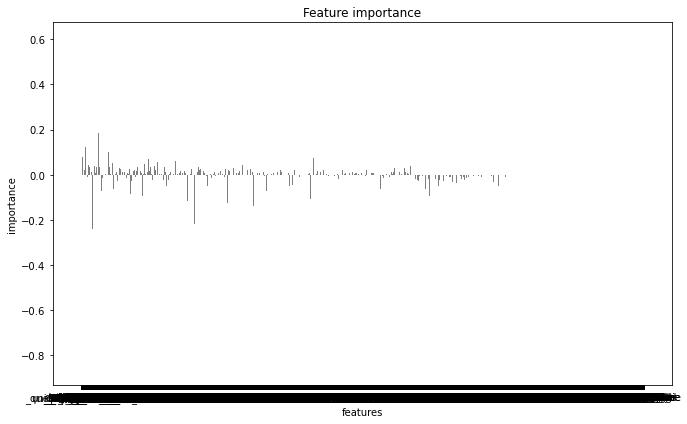

In [38]:
import numpy as np
import matplotlib.pyplot as plt
cols = data_no_bigrams.drop('_label_', axis = 1).columns
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, LR.coef_[0], color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

In [39]:
coefs = {key:LR.coef_[0][k] for k,key in enumerate(cols)}
print(sorted(coefs.items(),key= lambda x:x[1])[:5])
print(sorted(coefs.items(),key= lambda x:-x[1])[:5])

[('fevrier', -0.8577288043942795), ('position', -0.7302362862554065), ('brunck', -0.5351534975050263), ('covid', -0.5012800916440995), ('prendre', -0.4642529956883047)]
[('abouti', 0.6015877995579364), ('objet', 0.3188651492843463), ('maximum', 0.30489232863757953), ('renouvellement', 0.2981722892653088), ('plonquer', 0.28635190278464084)]


## Subsampling

In [58]:
np.random.seed(42)
x1 = data_no_bigrams[data_no_bigrams._label_==0].sample(590, random_state=42)
y1 = x1._label_
x1 = x1.drop('_label_', axis = 1)
x2 = data_no_bigrams[data_no_bigrams._label_==1].sample(590, random_state=42)
y2 = x2._label_
x2 = x2.drop('_label_', axis = 1)
Xt = np.concatenate([x1,x2])
yt = np.concatenate([y1, y2])
Xt_train, Xt_val,yt_train, yt_val = train_test_split(Xt, yt, test_size=0.3, random_state=42)

In [61]:
from sklearn.svm import SVC
svc_sub = SVC(C = 0.1325, kernel = 'linear', random_state=42)
svc_sub.fit(Xt_train, yt_train)
y_pred = svc_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       186
           1       0.91      0.94      0.92       168

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



In [44]:
from sklearn.linear_model import LogisticRegression

LR_sub = LogisticRegression(C=1, solver = 'newton-cg', random_state=42)
LR_sub.fit(Xt_train, yt_train)
y_pred = LR_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       173
           1       0.94      0.93      0.93       172

    accuracy                           0.93       345
   macro avg       0.93      0.93      0.93       345
weighted avg       0.93      0.93      0.93       345



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_sub = KNeighborsClassifier(n_neighbors=3)
knn_sub.fit(Xt_train, yt_train)
y_pred = knn_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       186
           1       0.69      0.70      0.70       168

    accuracy                           0.71       354
   macro avg       0.71      0.71      0.71       354
weighted avg       0.71      0.71      0.71       354



In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_cos = KNeighborsClassifier(n_neighbors=3, metric = 'cosine')
knn_cos.fit(Xt_train, yt_train)
y_pred = knn_cos.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       186
           1       0.83      0.82      0.82       168

    accuracy                           0.83       354
   macro avg       0.83      0.83      0.83       354
weighted avg       0.83      0.83      0.83       354



### Importance des variables

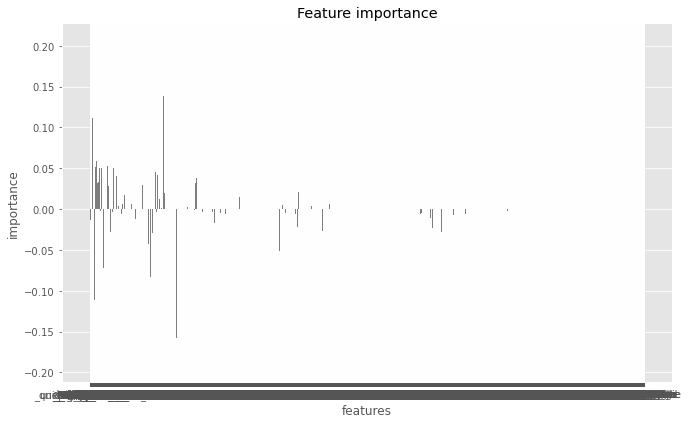

In [85]:
import numpy as np
import matplotlib.pyplot as plt
cols = data_no_bigrams.drop('_label_', axis = 1).columns
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, svc_sub.coef_[0], color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

In [87]:
coefs = {key:svc_sub.coef_[0][k] for k,key in enumerate(cols)}
print(sorted(coefs.items(),key= lambda x:x[1])[:5])
print(sorted(coefs.items(),key= lambda x:-x[1])[:5])

[('dec', -0.19166467837673837), ('metier', -0.18960265323071107), ('prendre', -0.17680778882955084), ('comite', -0.17268951764202464), ('newsletter', -0.15845119190553372)]
[('re', 0.20748375174010425), ('xavier', 0.19923154390242315), ('extraction', 0.1664160289353564), ('souscription', 0.15415107566533962), ('ok', 0.14638270307033258)]


# Classification - bigrams

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
np.random.seed(42)
plt.style.use('ggplot')

In [64]:
data = df_bigrams
# data = pd.read_json('data/mails_ohe_bigrams.json')
data.head()

,_questionmark_count_,_AJD_count_,_ADP_count_,_ADV_count_,_AUX_count_,_CCONJ_count_,_DET_count_,_INTJ_count_,_NOUN_count_,_NUM_count_,...,pack,articulation,ronde,nail,ecol,immobilier_lieu,lanrivain,batard,leudet,_label_
0,2,0,7,1,1,0,3,0,18,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,3,3,0,2,5,0,12,2,...,0,0,0,0,0,0,0,0,0,1
2,1,0,6,3,0,2,6,0,23,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,2,1,0,1,2,0,11,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,38,6,6,2,31,0,56,3,...,0,0,0,0,0,0,0,0,0,1


In [78]:
X_unlabeled = data.loc[data["_label_"] == 2].drop(columns=['_label_'])
X = data.loc[data["_label_"] != 2].drop(columns=['_label_'])
y = pd.Series(data.loc[data["_label_"] != 2]['_label_'], dtype=int)

In [79]:
np.random.seed(42)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
Counter(y_train)

Counter({1: 2665, 0: 330})

In [80]:
class_weigth = compute_class_weight('balanced', classes = [0,1], y = y_train.values)
class_weigth = {key:val for key,val in zip([0,1], class_weigth)}

In [81]:
from sklearn.svm import SVC

model_svc = SVC(C=0.1325, kernel = 'linear', class_weight=class_weigth, random_state = 42)
model_svc.fit(X_train, y_train)

y_pred = model_svc.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       142
           1       0.97      0.99      0.98      1142

    accuracy                           0.96      1284
   macro avg       0.93      0.88      0.90      1284
weighted avg       0.96      0.96      0.96      1284



In [82]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver = 'newton-cg', class_weight=class_weigth, random_state = 42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       142
           1       0.97      0.99      0.98      1142

    accuracy                           0.96      1284
   macro avg       0.93      0.88      0.90      1284
weighted avg       0.96      0.96      0.96      1284



##### Erreur de test de ce modèle

In [83]:
y_pred_test = LR.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       118
           1       0.98      0.99      0.98       952

    accuracy                           0.97      1070
   macro avg       0.94      0.91      0.92      1070
weighted avg       0.97      0.97      0.97      1070



In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56       142
           1       0.93      0.99      0.96      1142

    accuracy                           0.93      1284
   macro avg       0.89      0.71      0.76      1284
weighted avg       0.92      0.93      0.92      1284



In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_cos = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn_cos.fit(X_train, y_train)
y_pred = knn_cos.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       142
           1       0.97      0.99      0.98      1142

    accuracy                           0.96      1284
   macro avg       0.92      0.86      0.89      1284
weighted avg       0.96      0.96      0.96      1284



### Importance des variables

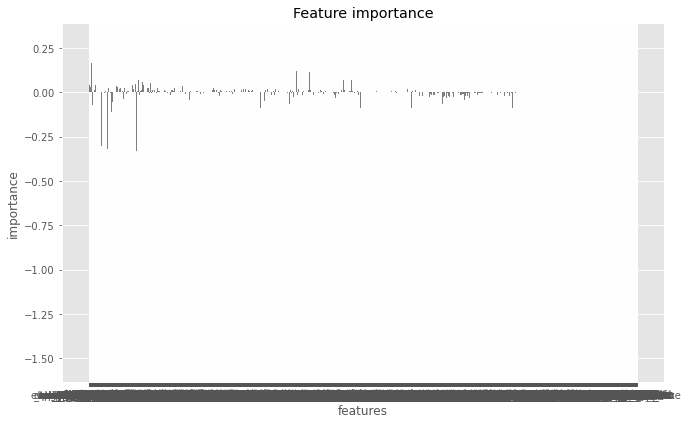

In [59]:
import numpy as np
import matplotlib.pyplot as plt

cols = data.drop('_label_', axis = 1).columns
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, LR.coef_[0], color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

In [67]:
coefs = {key:LR.coef_[0][k] for k,key in enumerate(cols)}
print(sorted(coefs.items(),key= lambda x:x[1])[:5])
print(sorted(coefs.items(),key= lambda x:-x[1])[:5])

[('_questionmark_count_', -1.5404138410987838), ('urgent', -0.6793455893918033), ('datalab', -0.6062914536821105), ('position_prendre', -0.6020684944593332), ('ancien', -0.5511623195391488)]
[('non_abouti', 0.2958359623300926), ('lassal_ludivine', 0.2761666650052437), ('liste_pous', 0.23955780953911593), ('technique_assurance', 0.22317914106853048), ('envoyer_mardi', 0.2121493279612777)]


## Subsampling

In [90]:
np.random.seed(42)
x1 = data[data._label_==0].sample(590, random_state = 42)
y1 = x1._label_
x1 = x1.drop('_label_', axis = 1)
x2 = data[data._label_==1].sample(590, random_state = 42)
y2 = x2._label_
x2 = x2.drop('_label_', axis = 1)
Xt = np.concatenate([x1,x2])
yt = np.concatenate([y1, y2])
Xt_train, Xt_val,yt_train, yt_val = train_test_split(Xt, yt, test_size=0.3, random_state = 42)

In [91]:
from sklearn.svm import SVC
svc_sub = SVC(C = 0.1325, kernel = 'linear', random_state = 42)
svc_sub.fit(Xt_train, yt_train)
y_pred = svc_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       186
           1       0.91      0.95      0.93       168

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



In [92]:
from sklearn.linear_model import LogisticRegression

LR_sub = LogisticRegression(C=1, solver = 'newton-cg', random_state = 42)
LR_sub.fit(Xt_train, yt_train)
y_pred = LR_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       186
           1       0.90      0.95      0.92       168

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_sub = KNeighborsClassifier(n_neighbors=3)
knn_sub.fit(Xt_train, yt_train)
y_pred = knn_sub.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       186
           1       0.67      0.68      0.67       168

    accuracy                           0.69       354
   macro avg       0.69      0.69      0.69       354
weighted avg       0.69      0.69      0.69       354



In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn_sub_cos = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn_sub_cos.fit(Xt_train, yt_train)
y_pred = knn_sub_cos.predict(Xt_val)
print(classification_report(yt_val,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       186
           1       0.81      0.69      0.74       168

    accuracy                           0.77       354
   macro avg       0.78      0.77      0.77       354
weighted avg       0.78      0.77      0.77       354



### Importance des variables

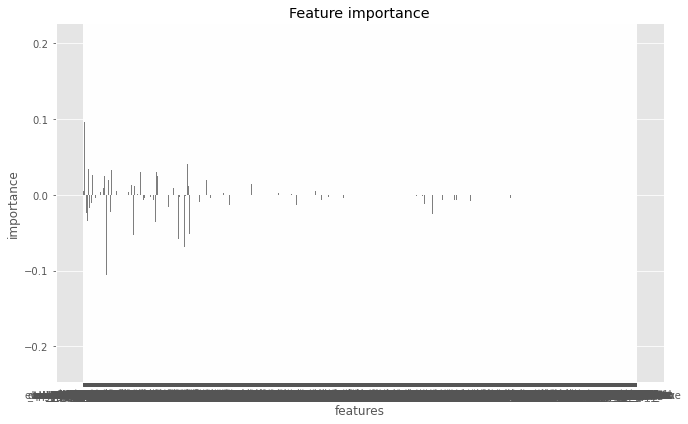

In [68]:
import numpy as np
import matplotlib.pyplot as plt
cols = data.drop('_label_', axis = 1).columns
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.bar(index, svc_sub.coef_[0], color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, cols)
plt.tight_layout()
plt.show()

In [97]:
coefs = {key:svc_sub.coef_[0][k] for k,key in enumerate(cols)}
print(sorted(coefs.items(),key= lambda x:x[1])[:5])
print(sorted(coefs.items(),key= lambda x:-x[1])[:5])

[('representant', -0.7951538554623365), ('bonjour', -0.3495868667729919), ('magieetfeer', -0.3369410100197193), ('unitairement', -0.3350958685450954), ('passage', -0.32858636770263333)]
[('cordialement', 0.4346148061409075), ('erwan', 0.3954023661111079), ('decibel', 0.37305802805984645), ('message', 0.3673367033871282), ('negatif', 0.2743650744852074)]
